<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbers from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

In [6]:
# from IPython.display import YouTubeVideo

# YouTubeVideo('Jml7NVYm8cs')

In [1]:
import pandas as pd

doc = './data/yelp_coffeeshop_review_data.csv'

df = pd.read_csv(doc)
df.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [4]:
df.shape

(7616, 3)

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [6]:
# Import Required Libariries
import pandas as pd
from collections import Counter

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import re
from nltk.stem import PorterStemmer
import spacy
from spacy.tokenizer import Tokenizer

In [2]:
df['coffee_shop_name'].value_counts()

Epoch Coffee                            400
Halcyon                                 300
The Factory - Cafe With a Soul          244
Houndstooth Coffee                      200
Venezia Italian Gelato                  200
                                       ... 
Lucky Lab Coffee                         25
Sister Coffee                            17
Kowabunga Coffee                         16
The Marvelous Vintage Tea Party Co.      10
Lola Savannah Coffee Downtown             4
Name: coffee_shop_name, Length: 79, dtype: int64

In [3]:
df['star_rating'].value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

In [28]:
df['full_review_text'].value_counts(normalize=True)[:2]

 10/15/2016 This place is really nice. They have done a great job... It's the type of place that you could spend hours in. They have a small menu right now, but their drinks, waffles, and pastries are really well made. We'll definitely be coming back soon.... like tomorrow. Viva Matcha Latte and Pop-art                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        0.000525
 11/23/2016 1 check-in My best friend and I came to The Factory after seeing it on a couple of best new Austin brunch lists. It's super cute and trendy, to the point where it feels ki

In [22]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [23]:
df['base_tokens'] = df['full_review_text'].apply(tokenize)
df['base_tokens'].head()

0    [11252016, 1, checkin, love, love, loved, the,...
1    [1222016, listed, in, date, night, austin, amb...
2    [11302016, 1, checkin, listed, in, brunch, spo...
3    [11252016, very, cool, decor, good, drinks, ni...
4    [1232016, 1, checkin, they, are, located, with...
Name: base_tokens, dtype: object

In [26]:
df[['full_review_text', 'base_tokens']][:10]

,full_review_text,base_tokens
0,11/25/2016 1 check-in Love love loved the atm...,"[11252016, 1, checkin, love, love, loved, the,..."
1,"12/2/2016 Listed in Date Night: Austin, Ambia...","[1222016, listed, in, date, night, austin, amb..."
2,11/30/2016 1 check-in Listed in Brunch Spots ...,"[11302016, 1, checkin, listed, in, brunch, spo..."
3,11/25/2016 Very cool decor! Good drinks Nice ...,"[11252016, very, cool, decor, good, drinks, ni..."
4,12/3/2016 1 check-in They are located within ...,"[1232016, 1, checkin, they, are, located, with..."
5,11/20/2016 1 check-in Very cute cafe! I think...,"[11202016, 1, checkin, very, cute, cafe, i, th..."
6,"10/27/2016 2 check-ins Listed in ""Nuptial Cof...","[10272016, 2, checkins, listed, in, nuptial, c..."
7,11/2/2016 2 check-ins Love this place! 5 sta...,"[1122016, 2, checkins, love, this, place, 5, s..."
8,"10/25/2016 1 check-in Ok, let's try this appr...","[10252016, 1, checkin, ok, lets, try, this, ap..."
9,11/10/2016 3 check-ins This place has been sh...,"[11102016, 3, checkins, this, place, has, been..."


In [27]:
# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
df['base_tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('the', 34809),
 ('and', 26650),
 ('a', 22755),
 ('i', 20237),
 ('to', 17164),
 ('of', 12600),
 ('is', 11999),
 ('coffee', 10353),
 ('was', 9707),
 ('in', 9546)]

In [ ]:
# These words don't have much value

In [29]:
def count(docs):
    '''This function takes a list of tokenized documents as input and returns
    a dataframe with frequency counts of words int he document set.
    
    # Arguments
        docs: list, tokenized list of documents
        
    # Returns
        wc: dataframe, 
    '''
    
    word_counts = Counter()
    appears_in = Counter()

    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [30]:
# Use the Function
wc = count(df['base_tokens'])
print(wc.shape)
wc.head()

(22031, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
31,the,6847,34809,1.0,0.044537,0.044537,0.899028
67,and,6864,26650,2.0,0.034098,0.078635,0.901261
4,a,6246,22755,3.0,0.029114,0.107749,0.820116
58,i,5528,20237,4.0,0.025893,0.133642,0.725840
70,to,5653,17164,5.0,0.021961,0.155602,0.742253


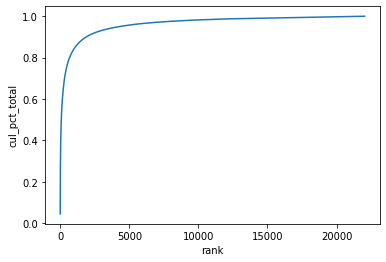

In [31]:
# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [32]:
wc[wc['rank'] <= 100]['cul_pct_total'].max()

0.5335194530026511

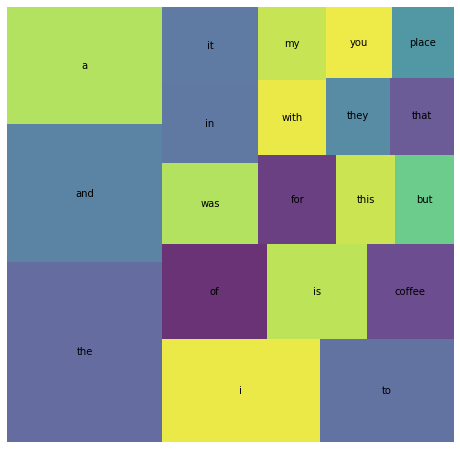

In [33]:
wc_top20 = wc[wc['rank'] <= 20]

plt.figure(figsize=(8,8))
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [48]:
df['star_rating'].replace(' ', '_', regex=True)

0       _5.0_star_rating_
1       _4.0_star_rating_
2       _4.0_star_rating_
3       _2.0_star_rating_
4       _4.0_star_rating_
              ...        
7611    _4.0_star_rating_
7612    _5.0_star_rating_
7613    _4.0_star_rating_
7614    _3.0_star_rating_
7615    _4.0_star_rating_
Name: star_rating, Length: 7616, dtype: object

In [ ]:
# I was initially getting no results in the code below when 
# I set the string as '5.0 star rating', but the code above
# showed me that there's white space at the beginning and 
# end of the strings. Since the code below works I don't think
# there is a need to proceed with filling the white space with
# an underscore

In [58]:
df_4 = df.loc[(df['star_rating'] == ' 4.0 star rating ')]
df_5 = df.loc[(df['star_rating'] == ' 5.0 star rating ')]
df_good = pd.concat([df_4, df_5])

df_1 = df.loc[(df['star_rating'] == ' 1.0 star rating ')]
df_2 = df.loc[(df['star_rating'] == ' 2.0 star rating ')]
df_3 = df.loc[(df['star_rating'] == ' 3.0 star rating ')]
df_bad = pd.concat([df_1, df_2, df_3])

In [79]:
print('Good ratings:\n')
print(df_good['star_rating'].value_counts()) 
print('- - - - - - - - - - - - - - - -')
print('Bad ratings:\n')
print(df_bad['star_rating'].value_counts())

Good ratings:

 5.0 star rating     3780
 4.0 star rating     2360
Name: star_rating, dtype: int64
- - - - - - - - - - - - - - - -
Bad ratings:

 3.0 star rating     738
 2.0 star rating     460
 1.0 star rating     278
Name: star_rating, dtype: int64


In [80]:
df_good['base_tokens'] = df_good['full_review_text'].apply(tokenize)
print('Good ratings:\n')
print(df_good['base_tokens'].head())
print('- - - - - - - - - - - - - - - -')
print('Bad ratings:\n')
df_bad['base_tokens'] = df_bad['full_review_text'].apply(tokenize)
print(df_bad['base_tokens'].head())

Good ratings:

1    [1222016, listed, in, date, night, austin, amb...
2    [11302016, 1, checkin, listed, in, brunch, spo...
4    [1232016, 1, checkin, they, are, located, with...
5    [11202016, 1, checkin, very, cute, cafe, i, th...
6    [10272016, 2, checkins, listed, in, nuptial, c...
Name: base_tokens, dtype: object
- - - - - - - - - - - - - - - -
Bad ratings:

25     [1222016, okay, so, after, visiting, my, frien...
39     [1222016, a, cafe, that, doesnt, have, wifi, b...
94     [9182016, i, was, not, impressed, first, of, a...
99     [942016, 2, checkins, second, attempt, at, the...
322    [11292015, when, i, lived, in, austin, mozarts...
Name: base_tokens, dtype: object


In [84]:
df_good['base_tokens'].apply(lambda x: word_counts.update(x))
# Print out the 10 most common words
word_counts.most_common(10)

df_bad['base_tokens'].apply(lambda x: word_counts.update(x))
# Print out the 10 most common words
word_counts.most_common(10)

wc_good = count(df_good['base_tokens'])
wc_bad = count(df_bad['base_tokens'])

In [85]:
# Use the Function
print(wc_good.shape)
wc_good.head()

(19188, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
11,the,5479,26616,1.0,0.044245,0.044245,0.892345
35,and,5545,21311,2.0,0.035426,0.079671,0.903094
2,a,4983,17706,3.0,0.029433,0.109104,0.811564
60,i,4344,14952,4.0,0.024855,0.133960,0.707492
36,to,4452,12763,5.0,0.021216,0.155176,0.725081


In [86]:
# Use the Function
print(wc_bad.shape)
wc_bad.head()

(10173, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
59,the,1368,8193,1.0,0.045513,0.045513,0.926829
18,and,1319,5339,2.0,0.029659,0.075172,0.893631
14,i,1184,5285,3.0,0.029359,0.104530,0.802168
23,a,1263,5049,4.0,0.028048,0.132578,0.855691
40,to,1201,4401,5.0,0.024448,0.157026,0.813686


#### Using spaCy...

In [87]:
# Inialize spaCy model and tokenizer
nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

In [89]:
# Make them tokens using the Tokenizer Pipe
tokens = []
for doc in tokenizer.pipe(df['full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

df['spaCy_tokens'] = tokens
df['spaCy_tokens'].head()

0    [ , 11/25/2016, 1, check-in, Love, love, loved...
1    [ , 12/2/2016, Listed, in, Date, Night:, Austi...
2    [ , 11/30/2016, 1, check-in, Listed, in, Brunc...
3    [ , 11/25/2016, Very, cool, decor!, Good, drin...
4    [ , 12/3/2016, 1, check-in, They, are, located...
Name: spaCy_tokens, dtype: object

In [90]:
# Make them tokens using the Tokenizer Pipe
tokens_good = []
for doc in tokenizer.pipe(df_good['full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens_good.append(doc_tokens)

df_good['spaCy_tokens'] = tokens_good
df_good['spaCy_tokens'].head()

1    [ , 12/2/2016, Listed, in, Date, Night:, Austi...
2    [ , 11/30/2016, 1, check-in, Listed, in, Brunc...
4    [ , 12/3/2016, 1, check-in, They, are, located...
5    [ , 11/20/2016, 1, check-in, Very, cute, cafe!...
6    [ , 10/27/2016, 2, check-ins, Listed, in, "Nup...
Name: spaCy_tokens, dtype: object

In [91]:
# Make them tokens using the Tokenizer Pipe
tokens_bad = []
for doc in tokenizer.pipe(df_bad['full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens_bad.append(doc_tokens)

df_bad['spaCy_tokens'] = tokens_bad
df_bad['spaCy_tokens'].head()

25     [ , 12/2/2016, Okay,, so, after, visiting, my,...
39     [ , 12/2/2016, A, cafe, that, doesn't, have, W...
94     [ , 9/18/2016, I, was, not, impressed., First,...
99     [ , 9/4/2016, 2, check-ins, Second, attempt, a...
322    [ , 11/29/2015, When, I, lived, in, Austin,, M...
Name: spaCy_tokens, dtype: object

#### Incorporating Stop Words...

In [93]:
# Spacy's Default Stop Words
# nlp.Defaults.stop_words

# It's a looooong list and I don't know how to compress
# the output of code cells, so I'm leaving it commented out

In [94]:
tokens = []

# Return lower case tokens and ignore stop words/punctuation
for doc in tokenizer.pipe(df['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

df['spaCy_tokens_v2'] = tokens
df['spaCy_tokens_v2'].head()

0    [ , 11/25/2016, 1, check-in, love, love, loved...
1    [ , 12/2/2016, listed, date, night:, austin,, ...
2    [ , 11/30/2016, 1, check-in, listed, brunch, s...
3    [ , 11/25/2016, cool, decor!, good, drinks, ni...
4    [ , 12/3/2016, 1, check-in, located, northcros...
Name: spaCy_tokens_v2, dtype: object

In [95]:
wc = count(df['spaCy_tokens_v2'])
print(wc.shape)
wc.head()

(40396, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
7,,7616,22606,1.0,0.053592,0.053592,1.000000
0,coffee,4210,8058,2.0,0.019103,0.072695,0.552784
158,place,3029,4264,3.0,0.010109,0.082803,0.397715
95,great,2438,3250,4.0,0.007705,0.090508,0.320116
282,it's,2061,3117,5.0,0.007389,0.097897,0.270614


#### Repeat for 'Good' and 'Bad' Reviews...

In [97]:
tokens_good = []

# Return lower case tokens and ignore stop words/punctuation
for doc in tokenizer.pipe(df_good['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens_good.append(doc_tokens)

df_good['spaCy_tokens_v2'] = tokens_good
df_good['spaCy_tokens_v2'].head()

1    [ , 12/2/2016, listed, date, night:, austin,, ...
2    [ , 11/30/2016, 1, check-in, listed, brunch, s...
4    [ , 12/3/2016, 1, check-in, located, northcros...
5    [ , 11/20/2016, 1, check-in, cute, cafe!, thin...
6    [ , 10/27/2016, 2, check-ins, listed, "nuptial...
Name: spaCy_tokens_v2, dtype: object

In [99]:
tokens_bad = []

# Return lower case tokens and ignore stop words/punctuation
for doc in tokenizer.pipe(df_bad['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens_bad.append(doc_tokens)

df_bad['spaCy_tokens_v2'] = tokens_bad
df_bad['spaCy_tokens_v2'].head()

25     [ , 12/2/2016, okay,, visiting, friends, la, t...
39     [ , 12/2/2016, cafe, doesn't, wifi, makes, ord...
94     [ , 9/18/2016, impressed., all,, parking, huge...
99     [ , 9/4/2016, 2, check-ins, second, attempt, p...
322    [ , 11/29/2015, lived, austin,, mozarts, spot,...
Name: spaCy_tokens_v2, dtype: object

In [98]:
wc_good = count(df_good['spaCy_tokens_v2'])
print(wc_good.shape)
wc_good.head()

(34302, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
4,,6140,17766,1.0,0.054043,0.054043,1.000000
28,coffee,3383,6421,2.0,0.019532,0.073575,0.550977
121,place,2432,3389,3.0,0.010309,0.083884,0.396091
54,great,2174,2902,4.0,0.008828,0.092712,0.354072
220,it's,1647,2500,5.0,0.007605,0.100316,0.268241


In [100]:
wc_bad = count(df_bad['spaCy_tokens_v2'])
print(wc_bad.shape)
wc_bad.head()

(16334, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
46,,1476,4840,1.0,0.051999,0.051999,1.000000
0,coffee,827,1637,2.0,0.017587,0.069586,0.560298
79,place,597,875,3.0,0.009401,0.078987,0.404472
138,like,548,834,4.0,0.008960,0.087947,0.371274
266,it's,414,617,5.0,0.006629,0.094576,0.280488


In [ ]:
# TODO: Repeat for additional stop words

# STOP_WORDS = nlp.Defaults.stop_words.union(['LIST,'ADDITIONAL', 'WORDS', 'HERE'])
# STOP_WORDS

# Refer to 'Statistical Trimming' in lecture for ideas on which 
# words to add to the list

In [ ]:
# Explore - https://spacy.io/api/token

In [106]:
wc.head(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
7,,7616,22606,1.0,0.053592,0.053592,1.000000
0,coffee,4210,8058,2.0,0.019103,0.072695,0.552784
158,place,3029,4264,3.0,0.010109,0.082803,0.397715
95,great,2438,3250,4.0,0.007705,0.090508,0.320116
282,it's,2061,3117,5.0,0.007389,0.097897,0.270614
180,like,2034,2902,6.0,0.006880,0.104777,0.267069
168,good,2084,2779,7.0,0.006588,0.111365,0.273634
2,1,1998,2035,8.0,0.004824,0.116190,0.262342
3,check-in,1957,1961,9.0,0.004649,0.120839,0.256959
29,love,1434,1806,10.0,0.004281,0.125120,0.188288


In [105]:
wc['word'][7]

' '

In [107]:
wc['appears_in_pct'].describe()

count    40396.000000
mean         0.001200
std          0.008846
min          0.000131
25%          0.000131
50%          0.000131
75%          0.000525
max          1.000000
Name: appears_in_pct, dtype: float64

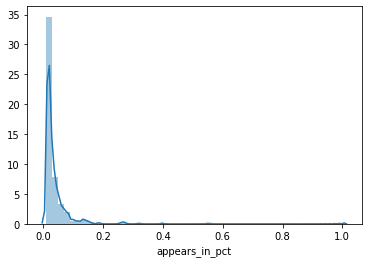

In [114]:
# Tree-Map w/ Words that appear in a least 0.1% of documents. 
wc = wc[wc['appears_in_pct'] >= 0.001]
sns.distplot(wc['appears_in_pct']);

In [119]:
wc_good.head(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
4,,6140,17766,1.0,0.054043,0.054043,1.000000
28,coffee,3383,6421,2.0,0.019532,0.073575,0.550977
121,place,2432,3389,3.0,0.010309,0.083884,0.396091
54,great,2174,2902,4.0,0.008828,0.092712,0.354072
220,it's,1647,2500,5.0,0.007605,0.100316,0.268241
262,good,1643,2180,6.0,0.006631,0.106948,0.267590
198,like,1486,2068,7.0,0.006291,0.113238,0.242020
99,1,1621,1649,8.0,0.005016,0.118255,0.264007
14,love,1263,1604,9.0,0.004879,0.123134,0.205700
79,check-in,1598,1602,10.0,0.004873,0.128007,0.260261


In [127]:
wc_bad.head(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
46,,1476,4840,1.0,0.051999,0.051999,1.000000
0,coffee,827,1637,2.0,0.017587,0.069586,0.560298
79,place,597,875,3.0,0.009401,0.078987,0.404472
138,like,548,834,4.0,0.008960,0.087947,0.371274
266,it's,414,617,5.0,0.006629,0.094576,0.280488
21,good,441,599,6.0,0.006435,0.101011,0.298780
24,don't,340,430,7.0,0.004620,0.105631,0.230352
787,i'm,305,422,8.0,0.004534,0.110164,0.206640
304,1,377,386,9.0,0.004147,0.114311,0.255420
118,food,266,369,10.0,0.003964,0.118276,0.180217


#### Adding Stop Words...

In [122]:
STOP_WORDS = nlp.Defaults.stop_words.union([
    ' ','coffee', 'place', "it's", '1', 'check-in',
    "i'm", "i've"])

In [145]:
tokens = []
for doc in tokenizer.pipe(df['full_review_text'], batch_size=500):
    
    doc_tokens = []
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
df['spaCy_tokens_v3'] = tokens

In [138]:
wc = count(df['spaCy_tokens_v3'])
print(wc.shape)
wc.head()

(40482, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
92,great,2438,3250,1.0,0.008548,0.008548,0.320116
177,like,2034,2902,2.0,0.007633,0.016181,0.267069
165,good,2084,2779,3.0,0.007309,0.023490,0.273634
25,love,1434,1806,4.0,0.004750,0.028240,0.188288
148,-,919,1773,5.0,0.004663,0.032903,0.120667


In [151]:
# tokens_good = []
# for doc in tokenizer.pipe(df_good['full_review_text'], batch_size=500):
    
#     doc_tokens_good = []
#     for token in doc: 
#         if token.text.lower() not in STOP_WORDS:
#             doc_tokens_good.append(token.text.lower())
   
#     tokens.append(doc_tokens_good)
    
# df_good['spaCy_tokens_v3'] = tokens_good

# # ValueError: Length of values does not match length of index

In [152]:
# Splitting dataset again since the code above doesn't work

df_4 = df.loc[(df['star_rating'] == ' 4.0 star rating ')]
df_5 = df.loc[(df['star_rating'] == ' 5.0 star rating ')]
df_good = pd.concat([df_4, df_5])

df_1 = df.loc[(df['star_rating'] == ' 1.0 star rating ')]
df_2 = df.loc[(df['star_rating'] == ' 2.0 star rating ')]
df_3 = df.loc[(df['star_rating'] == ' 3.0 star rating ')]
df_bad = pd.concat([df_1, df_2, df_3])

In [155]:
wc_good = count(df_good['spaCy_tokens_v3'])
print(wc_good.shape)
wc_good.head(15)

(34367, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
53,great,2174,2902,1.0,0.009808,0.009808,0.354072
258,good,1643,2180,2.0,0.007368,0.017176,0.267590
196,like,1486,2068,3.0,0.006989,0.024165,0.242020
14,love,1263,1604,4.0,0.005421,0.029586,0.205700
110,-,727,1431,5.0,0.004836,0.034422,0.118404
755,little,1027,1230,6.0,0.004157,0.038579,0.167264
216,nice,962,1101,7.0,0.003721,0.042301,0.156678
1289,best,951,1093,8.0,0.003694,0.045995,0.154886
129,friendly,986,1014,9.0,0.003427,0.049422,0.160586
5,austin,875,1013,10.0,0.003424,0.052845,0.142508


In [156]:
wc_bad = count(df_bad['spaCy_tokens_v3'])
print(wc_bad.shape)
wc_bad.head(15)

(16383, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
135,like,548,834,1.0,0.009891,0.009891,0.371274
20,good,441,599,2.0,0.007104,0.016995,0.298780
23,don't,340,430,3.0,0.005100,0.022094,0.230352
115,food,266,369,4.0,0.004376,0.026470,0.180217
354,time,264,351,5.0,0.004163,0.030633,0.178862
353,pretty,278,349,6.0,0.004139,0.034772,0.188347
212,great,264,348,7.0,0.004127,0.038899,0.178862
776,-,192,342,8.0,0.004056,0.042955,0.130081
273,people,247,327,9.0,0.003878,0.046833,0.167344
56,service,261,314,10.0,0.003724,0.050557,0.176829


## Can you visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


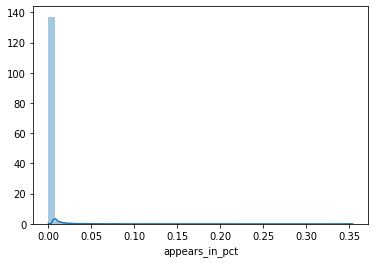

In [157]:
# Frequency of appears in documents
sns.distplot(wc_good['appears_in_pct']);

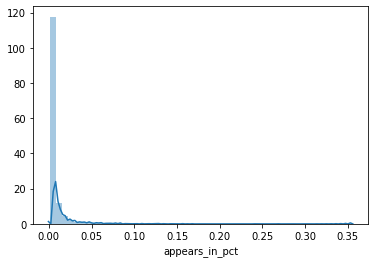

In [158]:
wc_good = wc_good[wc_good['appears_in_pct'] >= 0.001]
sns.distplot(wc_good['appears_in_pct']);

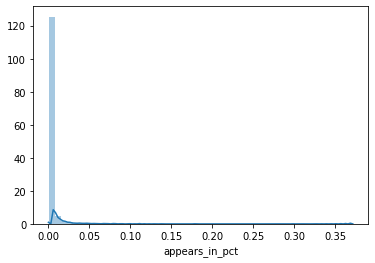

In [161]:
# Frequency of appears in documents
sns.distplot(wc_bad['appears_in_pct']);

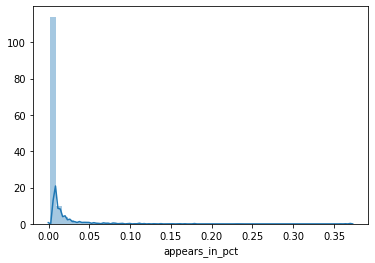

In [162]:
wc_bad = wc_bad[wc_bad['appears_in_pct'] >= 0.001]
sns.distplot(wc_bad['appears_in_pct']);

In [160]:
wc_good.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
53,great,2174,2902,1.0,0.009808,0.009808,0.354072
258,good,1643,2180,2.0,0.007368,0.017176,0.267590
196,like,1486,2068,3.0,0.006989,0.024165,0.242020
14,love,1263,1604,4.0,0.005421,0.029586,0.205700
110,-,727,1431,5.0,0.004836,0.034422,0.118404
755,little,1027,1230,6.0,0.004157,0.038579,0.167264
216,nice,962,1101,7.0,0.003721,0.042301,0.156678
1289,best,951,1093,8.0,0.003694,0.045995,0.154886
129,friendly,986,1014,9.0,0.003427,0.049422,0.160586
5,austin,875,1013,10.0,0.003424,0.052845,0.142508


In [163]:
wc_bad.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
135,like,548,834,1.0,0.009891,0.009891,0.371274
20,good,441,599,2.0,0.007104,0.016995,0.298780
23,don't,340,430,3.0,0.005100,0.022094,0.230352
115,food,266,369,4.0,0.004376,0.026470,0.180217
354,time,264,351,5.0,0.004163,0.030633,0.178862
353,pretty,278,349,6.0,0.004139,0.034772,0.188347
212,great,264,348,7.0,0.004127,0.038899,0.178862
776,-,192,342,8.0,0.004056,0.042955,0.130081
273,people,247,327,9.0,0.003878,0.046833,0.167344
56,service,261,314,10.0,0.003724,0.050557,0.176829


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

